SOHAM SHAH

PREDICTION USING UNSUPERVISED MACHINE LEARNING

PREDICT THE OPTIMUM NUMBER OF CLUSTERS AND REPRESENT IT VISUALLY

Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

Loading the dataset

In [2]:
path = "Iris.csv"
data = pd.read_csv(path)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Check for Nan values in the dataset

In [4]:
print(data.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.Species.nunique()

3

In [7]:
data.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

NOW LET'S VISUALIZE THE INPUT DATA 

/var/folders/s9/nyhdy3gs2_x8q2lrdz4280zw0000gn/T/ipykernel_67568/3189211080.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(x='species', y='sepal_length', data=iris, palette='Set2')  # 'Set2' is a predefined color palette in Seaborn


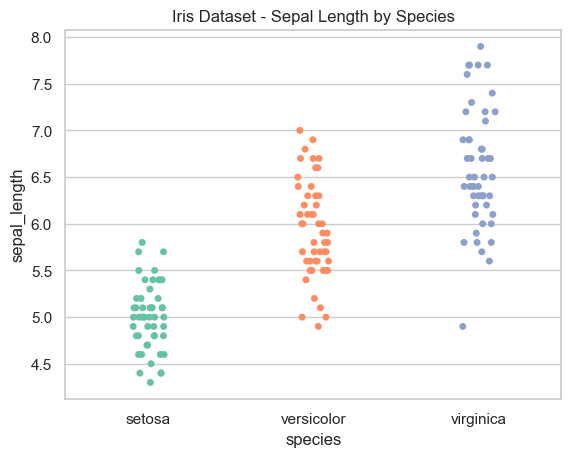

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
iris = sns.load_dataset('iris')

# Creating a strip plot with a specific color palette
ax = sns.stripplot(x='species', y='sepal_length', data=iris, palette='Set2')  # 'Set2' is a predefined color palette in Seaborn
plt.title('Iris Dataset - Sepal Length by Species')
plt.show()


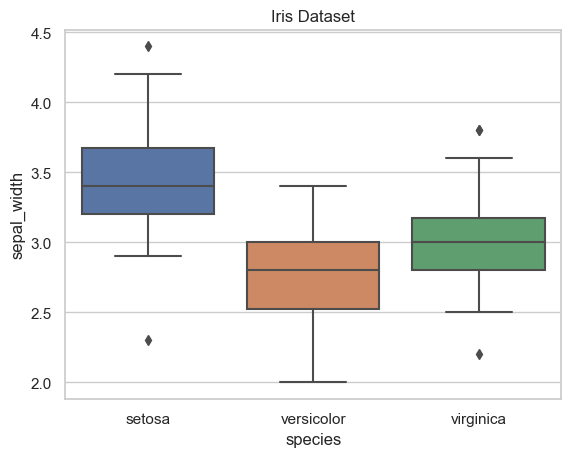

In [9]:
sns.boxplot(x = 'species', y = 'sepal_width',data = iris)
plt.title('Iris Dataset')
plt.show()

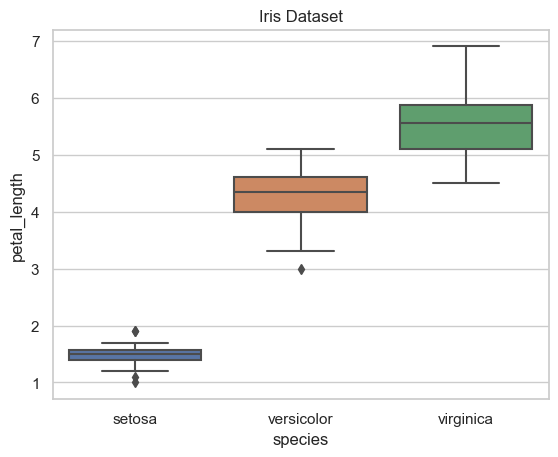

In [10]:
sns.boxplot(x = 'species', y = 'petal_length',data = iris)
plt.title('Iris Dataset')
plt.show()

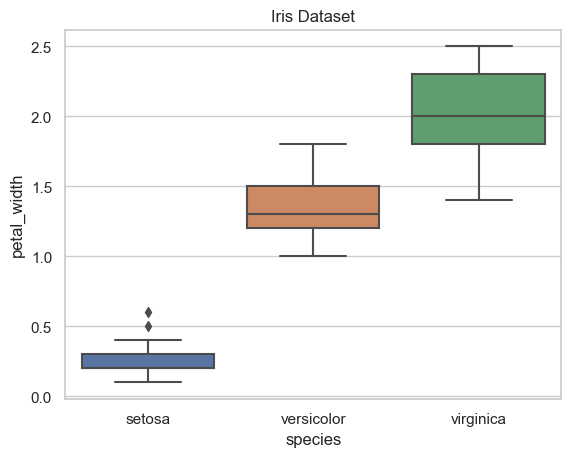

In [11]:
sns.boxplot(x = 'species', y = 'petal_width',data = iris)
plt.title('Iris Dataset')
plt.show()

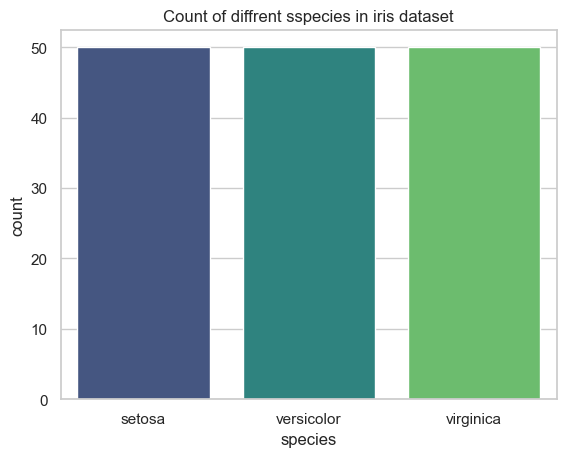

In [12]:
sns.countplot(x = 'species', data = iris, palette="viridis")
plt.title("Count of diffrent sspecies in iris dataset")
plt.show()

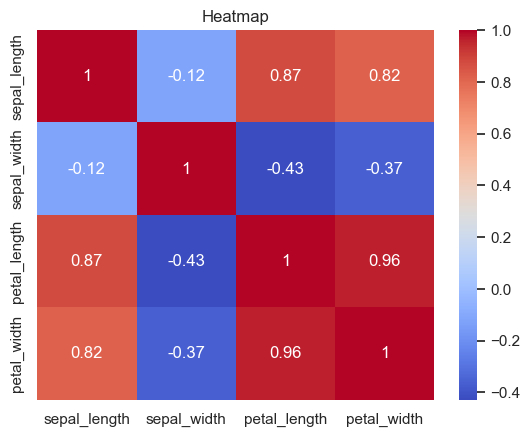

In [13]:
numeric_data = iris.select_dtypes(include=[np.number])  # This keeps only numeric columns

# Generate the heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap")
plt.show()


Now lets Find optimum number of clustering using k-means clustering algorithm

In [14]:
x = data.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(init="k-means++", n_clusters=i, n_init=10, max_iter=300, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print('k:', i, "wcss:",  kmeans.inertia_)

k: 1 wcss: 281831.54466666665
k: 2 wcss: 70581.38079999998
k: 3 wcss: 31320.7112
k: 4 wcss: 17793.590507045505
k: 5 wcss: 11424.765205784204
k: 6 wcss: 7961.650126873528
k: 7 wcss: 5922.741856060606
k: 8 wcss: 4542.214812865497
k: 9 wcss: 3588.4878586601308
k: 10 wcss: 2933.402648809524


<function matplotlib.pyplot.show(close=None, block=None)>

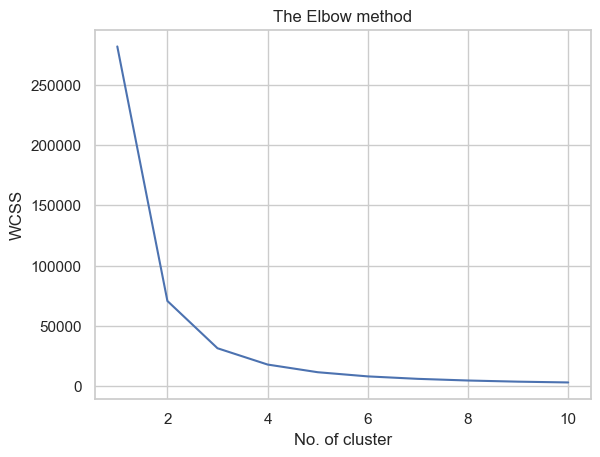

In [15]:
#ploting the results
plt.plot(range(1,11),wcss)
plt.title("The Elbow method")
plt.xlabel("No. of cluster")
plt.ylabel("WCSS")
plt.show

Initializing K-means with the optimum number of clusters & Prdicting the values

In [16]:
# Fitting the Kmean in the data
kmeans = KMeans(init="k-means++", n_clusters = 3, n_init=10, max_iter=300, random_state=0)

# Returns a lable for each data point based on the number of cluster
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

Now, Visualize the clusters

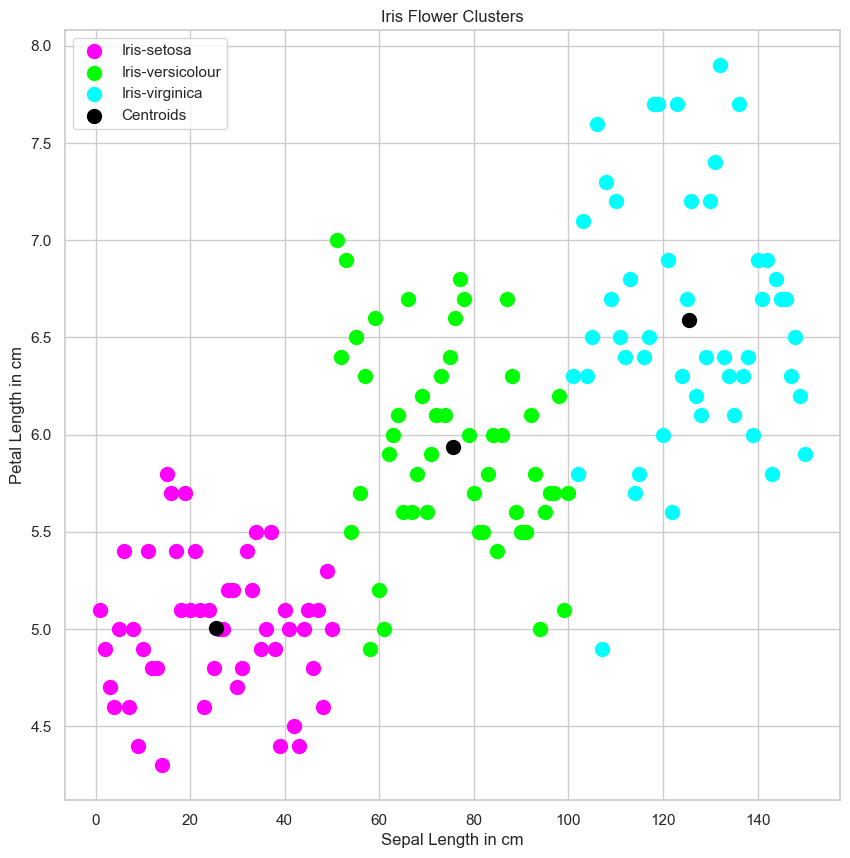

In [17]:
import matplotlib.pyplot as plt

# Assuming kmeans and y_kmeans are already defined with the appropriate KMeans fitting and predictions
# Visualizing the Clusters with a different color palette
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='magenta', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='lime', label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='cyan', label='Iris-virginica')

# Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()
